
# Project: Investigate Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project, we will analyze the movie data associate with the numbers, such as popularity, revenue, and budget, and features of the movies, such as production companies, keywords, and genres. In particular, we are interested in comparing the relationship between budget and popularity, and budget and revenue as well. Similarly, we analyze which production companies provide more revenue, and which genre is the most popular.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Load the dataset using pandas, and visualize the first 5 rows.

In [2]:
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Here we can see how many rows (movies) and columns we have in this dataframe.
df.shape

(10866, 21)

Here we get more information about the data frame. It is possible to see some missing values in some columns, such as homepage, and director. Also, we can see that some columns have data types differents than they should be, that is the case of id (must be object), budget (must to be a float), revenue (must to be float), and release date (must to be date).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Here we can see clearly which columns have missing values, that columns should have zero missing value.

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Here we can see how many duplicated values we have in this dataframe, with only one value, we can drop it.

In [6]:
df.duplicated().sum()

1



### Data Cleaning

First, it was analyzed which columns are importants for the case, for this reason, the column "homepage" will be dropped. This column has information that adds less value than the others, and has a huge number of missing value as well. For the same reason, the column "tagline" will be dropped too.

In [7]:
df.drop(['homepage', 'tagline'], axis = 1, inplace = True)
df.head()



,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
#Now, looking for the missing values, here is the situation:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
#It is necessary to drop this missing values:
df.dropna(inplace=True)

In [10]:
#checking if there is more missing values
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [11]:
#Now, it is necessary to look for the duplicates value, in previous line, we saw that there is one duplicated value:
df.drop_duplicates(inplace=True)

In [12]:
#checking if there is more duplicated values
df.duplicated().sum()

0

In [13]:
#With theses changes, the dataframe has 8664 instances and 19 columns.
df.shape

(8664, 19)

Now, the dataframe don't have missing values nor duplicated values, for finish, it is necessary to fix datatype in these columns: id (must be object), budget (must be float), revenue (must be float), and release date (must be date).

In [14]:
df.id = df.id.astype(object)
df.budget = df.budget.astype(float)
df.revenue = df.revenue.astype(float)
df.release_date = df.release_date.astype('datetime64[ns]')

In [15]:
#Checking if the columns are with correct datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8664 entries, 0 to 10865
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    8664 non-null   object        
 1   imdb_id               8664 non-null   object        
 2   popularity            8664 non-null   float64       
 3   budget                8664 non-null   float64       
 4   revenue               8664 non-null   float64       
 5   original_title        8664 non-null   object        
 6   cast                  8664 non-null   object        
 7   director              8664 non-null   object        
 8   keywords              8664 non-null   object        
 9   overview              8664 non-null   object        
 10  runtime               8664 non-null   int64         
 11  genres                8664 non-null   object        
 12  production_companies  8664 non-null   object        
 13  release_date     

In [16]:
#Starting the EDA, it is necessary to understanding the dataset through describe method
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,8664.000000,8.664000e+03,8.664000e+03,8664.000000,8664.000000,8664.000000,8664.000000,8.664000e+03,8.664000e+03
mean,0.742008,1.771346e+07,4.926000e+07,103.829986,264.257041,6.003463,2000.127770,2.131241e+07,6.363909e+07
std,1.087770,3.357642e+07,1.289657e+08,26.191973,635.259827,0.893580,13.222117,3.710556e+07,1.593028e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.249966,0.000000e+00,0.000000e+00,91.000000,20.000000,5.500000,1993.000000,0.000000e+00,0.000000e+00
50%,0.449377,1.500000e+06,1.832440e+05,100.000000,54.000000,6.100000,2004.000000,2.143152e+06,1.912162e+05
75%,0.843154,2.100000e+07,3.891090e+07,113.000000,200.000000,6.600000,2011.000000,2.811526e+07,5.528980e+07
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis



### Is there any relation among budget, popularity and revenue?

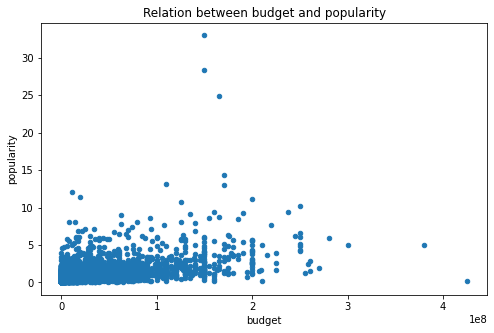

In [132]:
# To answer this question, it is necessary to plot a scatter plot between these variables.
df.plot(x="budget", y="popularity", kind="scatter",title = "Relation between budget and popularity", xlabel = "Budget", ylabel = "Popularity", figsize = (8,5));

In [18]:
#calculating the correlation, moderate correlation - one variable doesn't impact so much the other.
df["budget"].corr(df["popularity"])

0.5331487991977293

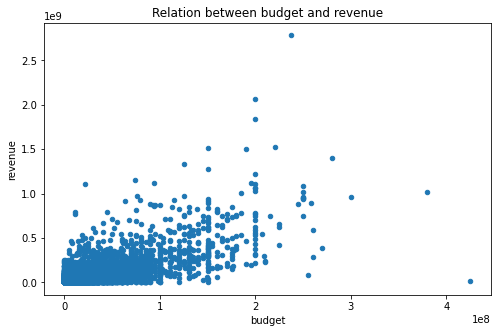

In [133]:
df.plot(x="budget", y="revenue", kind="scatter", title = "Relation between budget and revenue", xlabel = "Budget", ylabel = "Revenue", figsize = (8,5));

In [20]:
#calculating the correlation, positive strong correlation - one variable increase together with the other.
df["budget"].corr(df["revenue"])

0.7293328802712933

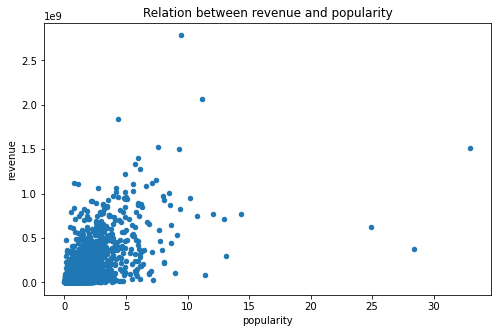

In [134]:
df.plot(x="popularity", y="revenue", kind="scatter", title = "Relation between revenue and popularity", xlabel = "Popularity", ylabel = "Revenue", figsize = (8,5));

In [22]:
#calculating the correlation, moderate correlation - one variable doesn't impact so much the other.
df["popularity"].corr(df["revenue"])

0.6591471923403401

### Which genre have more popularity?

In [25]:
# Now, it is necessary to split the column 'genre'
df2 = df['genres'].str.split("|", expand = True)
df2.head()

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [26]:
#rename new columns
df2 = df2.set_axis(['Genre_1', 'Genre_2', 'Genre_3', 'Genre_4', 'Genre_5'], axis=1, inplace=False)

In [40]:
#get only the revenue column
df4 = df['popularity']
df4.head()

0    32.985763
1    28.419936
2    13.112507
3    11.173104
4     9.335014
Name: popularity, dtype: float64

In [41]:
#merge revenue with the genres.
df_combined = df2.merge(df4, left_index=True, right_index=True)
df_combined.head()

,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,popularity
0,Action,Adventure,Science Fiction,Thriller,None,32.985763
1,Action,Adventure,Science Fiction,Thriller,None,28.419936
2,Adventure,Science Fiction,Thriller,None,None,13.112507
3,Action,Adventure,Science Fiction,Fantasy,None,11.173104
4,Action,Crime,Thriller,None,None,9.335014


Creating a function that apply one operation in some data frame. In this case, we need to apply sum and count, to calculate the mean popularity of each genre, so it is necessary to use one time for sum and another for count.

In [94]:
from functools import reduce

def test(df_combined,function):
    if function=='count':
        df_list_s=[df_combined.groupby('Genre_'+str(x)).count().popularity.reset_index() for x in range(1,6)]
    else:
        df_list_s=[df_combined.groupby('Genre_'+str(x)).agg(function).popularity.reset_index() for x in range(1,6)]
    #change column name
    df_list_s =[df_list_s[x].rename(columns={'Genre_'+str(x+1):'Genre_1'}) for x in range(0,5)]
    #merge
    df_merged_genre = reduce(lambda  left,right: pd.merge(left,right,on=['Genre_1'],how='outer'), df_list_s).fillna(0)
    df_merged_genre = df_merged_genre.set_index('Genre_1')
    #sum
    df_list_final = df_merged_genre.sum(axis=1)
    
    return df_list_final


In [97]:
df_list_c = test(df_combined,'count')
df_list_s = test(df_combined,sum)
df_list_m=pd.DataFrame(df_list_s/df_list_c,columns=['Popularity'])
df_list_m.sort_values(by='Popularity',ascending=False)

,Popularity
Genre_1,
Adventure,1.280883
Science Fiction,1.145322
Fantasy,1.123327
Action,1.032016
Animation,1.020778
Family,0.920126
Thriller,0.817272
Crime,0.793151
War,0.792528


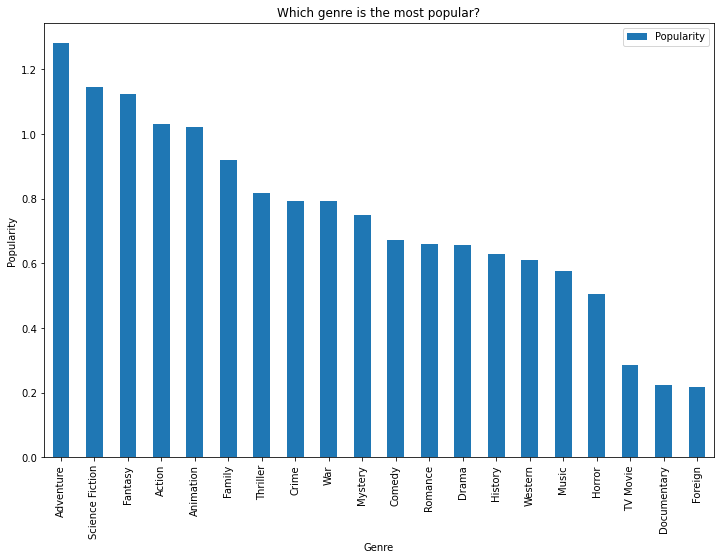

In [109]:
df_list_m.sort_values(by='Popularity',ascending=False).plot(y="Popularity", kind="bar", title = "Which genre is the most popular?", xlabel = "Genre", ylabel = "Popularity", figsize = (12,8));

We can conclude that adventure is the most popular genre, followed by Science Fiction and Fantasy.

### Which production company provides more revenue?

In [111]:
# Now, it is necessary to split the column 'production_companies'
df3 = df['production_companies'].str.split("|", expand = True)
df3.head()

,0,1,2,3,4
0,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


In [112]:
#rename new columns
df3 = df3.set_axis(['Company_1', 'Company_2', 'Company_3', 'Company_4', 'Company_5'], axis=1, inplace=False)

In [117]:
df31 = df['revenue']

In [119]:
#merge revenue with the company.
df_combined2 = df3.merge(df31, left_index=True, right_index=True)
df_combined2.head()

,Company_1,Company_2,Company_3,Company_4,Company_5,revenue
0,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu,1.513529e+09
1,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None,3.784364e+08
2,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None,2.952382e+08
3,Lucasfilm,Truenorth Productions,Bad Robot,None,None,2.068178e+09
4,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films,1.506249e+09


In [122]:
df10 = df_combined2.groupby('Company_1').sum().revenue
df11 = df_combined2.groupby('Company_2').sum().revenue
df12 = df_combined2.groupby('Company_3').sum().revenue
df13 = df_combined2.groupby('Company_4').sum().revenue
df14 = df_combined2.groupby('Company_5').sum().revenue

In [123]:
df11 = pd.DataFrame(df11.reset_index())
df10 = pd.DataFrame(df10.reset_index())
df12 = pd.DataFrame(df12.reset_index())
df13 = pd.DataFrame(df13.reset_index())
df14 = pd.DataFrame(df14.reset_index())

In [124]:
df11 = df11.set_axis(['Company_1', 'revenue_2'], axis=1, inplace=False)
df12 = df12.set_axis(['Company_1', 'revenue_3'], axis=1, inplace=False)
df13 = df13.set_axis(['Company_1', 'revenue_4'], axis=1, inplace=False)
df14 = df14.set_axis(['Company_1', 'revenue_5'], axis=1, inplace=False)


In [125]:
#Merge with these 4 dataframes
from functools import reduce
dataframes = [df10, df11, df12, df13, df14]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Company_1'],how='outer'), dataframes).fillna(0)

In [126]:
#sum the revenues
df_merged['revenue_total'] = df_merged['revenue'] + df_merged['revenue_2'] + df_merged['revenue_3'] + df_merged['revenue_4'] + df_merged['revenue_5']

In [128]:
#sort companies by revenue_total
df_merged.sort_values(by = ['revenue_total'], ascending=False).head(10)

,Company_1,revenue,revenue_2,revenue_3,revenue_4,revenue_5,revenue_total
2536,Warner Bros.,1.052951e+10,1.924815e+10,1.388651e+10,7.772248e+09,3.065733e+09,5.450215e+10
2453,Universal Pictures,3.954480e+10,7.352522e+09,6.487473e+08,0.000000e+00,0.000000e+00,4.754607e+10
1800,Paramount Pictures,3.918142e+10,1.983734e+09,0.000000e+00,0.000000e+00,0.000000e+00,4.116515e+10
2415,Twentieth Century Fox Film Corporation,2.335032e+10,1.230090e+10,1.436528e+09,3.583729e+08,0.000000e+00,3.744612e+10
2528,Walt Disney Pictures,3.248271e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.248271e+10
556,Columbia Pictures,2.898635e+10,3.719401e+08,0.000000e+00,0.000000e+00,0.000000e+00,2.935829e+10
1674,New Line Cinema,1.394993e+10,6.034507e+09,0.000000e+00,0.000000e+00,0.000000e+00,1.998444e+10
117,Amblin Entertainment,2.886326e+09,9.393552e+09,2.516580e+09,9.636794e+08,0.000000e+00,1.576014e+10
721,DreamWorks SKG,1.059449e+10,4.037106e+09,0.000000e+00,0.000000e+00,0.000000e+00,1.463160e+10
2386,Touchstone Pictures,3.860621e+09,5.234782e+09,2.573434e+09,1.147818e+09,6.384768e+08,1.345513e+10


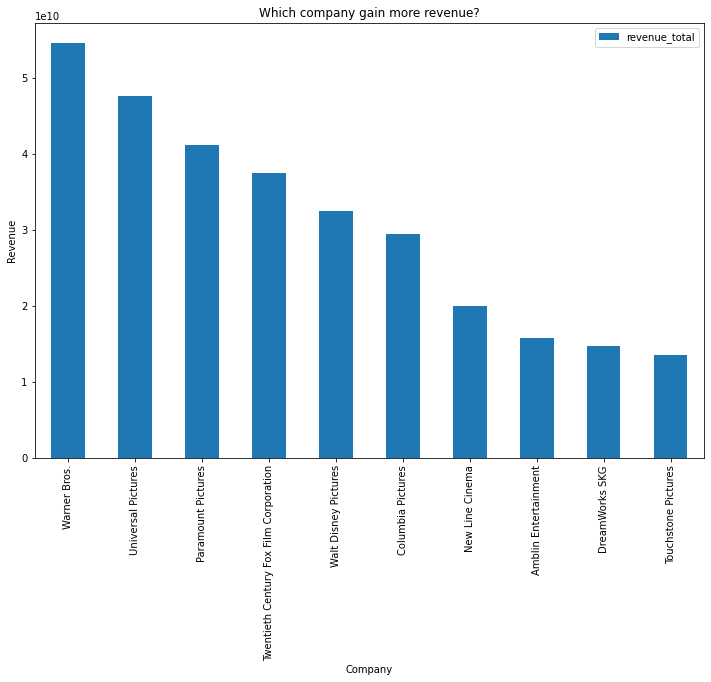

In [129]:
df_merged.sort_values(by = ['revenue_total'], ascending=False).head(10).plot(x="Company_1",y="revenue_total", kind="bar", title = "Which company gain more revenue?", xlabel = "Company", ylabel = "Revenue", figsize = (12,8));

we can conclude that Warner Bros is the bigger in revenue, followed by Universal and Paramount

### Limitations

This project faced some limitations throughout the development, and they are:
-The data is sufficient to prove all the questions, but it is necessary to eliminate almost 10% because of missing values.
-Some columns were classified by the wrong type of data.
-Some columns, such as genre and production companies, are divided by "|", and it was a challenge to manipulate, and don't exist any standards in these columns, example: the genre "action" could be the first word, or the second, until the last word.

<a id='conclusions'></a>
## Conclusions


To sum up, we are able to answer these 3 questions: Is there any relation between budget, popularity, and revenue? Which genre is the most popular? Which production company receives more revenue?

For the first question, it was calculated the relation among these 3 variables:
-Budget x Popularity: 0.5331487991977293 - Moderate Correlation (<0.70 and >0.40)
-Budget x Revenue: 0.7293328802712933 - Strong Correlation (>0.70 and <0.89)
-Popularity x Revenue: 0.6591471923403401 - Moderate Correlation (<0.70 and >0.40)

Thus, we can see a strong correlation only between Budget and revenue, so for this reason we can only conclude that if the movie increases your budget, there is a high chance to increase the revenue.

For the second question, we can conclude that Adventure is the most popular genre, followed by Science Fiction and Fantasy.

Finally, for the last question, we can conclude that Warner Bros is the bigger in revenue, followed by Universal and Paramount.